# **Fundamentos de python para Deep Learning**

**Diego Renza Torres**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

import time

# Representaciones de datos

Un tensor representa un arreglo (posiblemente multi-dimensional) de valores numéricos

In [2]:
# Escalares (tensores rank-0)
x = np.array(589)
x

array(589)

In [3]:
x.ndim

0

In [4]:
# Vectores (tensores rank-1)
x = np.array([11, 7, 9, 16, 5])
x

array([11,  7,  9, 16,  5])

In [ ]:
x.ndim

1

In [ ]:
# Matrices (tensores rank-2)
x = np.array([[10, 23, 11, 13, 20],
              [5, 37, 6, 43, 0],
              [2, 12, 27, 31, 3]])
x.ndim

array([[10, 23, 11, 13, 20],
       [ 5, 37,  6, 43,  0],
       [ 2, 12, 27, 31,  3]])

In [ ]:
# Rank 3 y tensores de orden superior
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

# Atributos clave

In [ ]:
(x_train , y_train ), (x_test , y_test ) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.ndim

3

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.dtype # Unsigned integer 8 bits... 0.... 255

dtype('uint8')

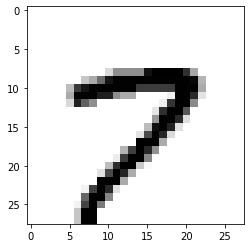

In [ ]:
# Imagen de ejemplo: tomar la novena imagen del dataset
digito = x_train[123]
plt.imshow(digito, cmap=plt.cm.binary)
plt.show()

In [ ]:
# Etiqueta de la la cuarta imagen del dataset
y_train[123]

7

# Manejo de tensores en NumPy

In [ ]:
lote1 = x_train[10:100]
lote1.shape

(90, 28, 28)

In [ ]:
lote2 = x_train[10:100, :, :]
lote2.shape

(90, 28, 28)

In [ ]:
lote3 = x_train[10:100, 0:10, 0:10]
lote3.shape

(90, 10, 10)

In [ ]:
lote4 = x_train[:, 20:, 20:]
lote4.shape

(60000, 8, 8)

In [ ]:
lote5 = x_train[:, 7:-7, 0:-2]
lote5.shape

(60000, 14, 26)

# Lotes o grupos de datos (Batch)

In [ ]:
# Primer lote
batch1 = x_train[:32]
batch1.shape

(32, 28, 28)

In [ ]:
# Segundo lote
batch2 = x_train[32:64]
batch2.shape

(32, 28, 28)

In [ ]:
# Enésimo lote
n = 3
lote8 = x_train[32*n : 32 * (n + 1)]
lote8.shape

(32, 28, 28)

# Operaciones con tensores

In [ ]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Tiempo de ejecución (NumPy): {0:.2f} s".format(time.time() - t0))

Tiempo de ejecución (NumPy): 0.01 s


In [ ]:
def rectificador(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def suma(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
# Element-wise
# Cálculo de tiempo de ejecución - Función ReLU
t0 = time.time()
for _ in range(1000):
    z = suma(x, y)
    z = rectificador(z)
print("Tiempo de ejecución (element-wise): {0:.2f} s".format(time.time() - t0))

Tiempo de ejecución (element-wise): 1.68 s


# Broadcast

In [ ]:
X = np.random.random((3, 1))
y = np.random.random((1,2))
print(X.shape)
print(y.shape)

X, y

(3, 1)
(1, 2)


(array([[0.33147081],
        [0.00835675],
        [0.54052752]]), array([[0.31108196, 0.30284011]]))

In [ ]:
# Ejemplo 1. Broadcast en filas y columnas
X+y

array([[0.64255278, 0.63431092],
       [0.31943872, 0.31119686],
       [0.85160949, 0.84336763]])

#Producto de tensores (ej. multiplicación de matrices)

https://charchithowitzer.medium.com/matrix-multiplication-why-is-it-a-big-deal-cc8ef7490008

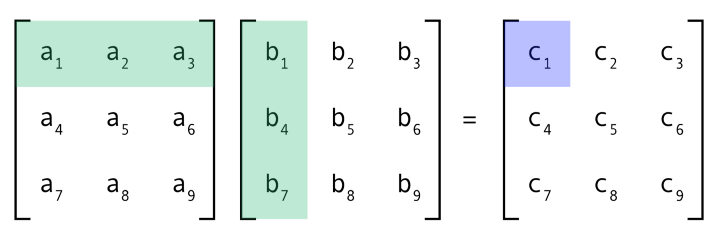

In [ ]:
x = np.random.random((32,5))
y = np.random.random((5,32))

print(x.shape)
print(y.shape)

(32, 5)
(5, 32)


In [ ]:
z = np.dot(x, y)
print(z.shape)

(32, 32)


# Reshape de tensores

In [ ]:
(x_train , y_train ), (x_test , y_test ) = mnist.load_data ()
x_train2 = x_train.reshape((60000, 28 * 28))
x_train2.shape

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

# Tensores con Tensorflow

In [ ]:
x = tf.range(12)
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [ ]:
x.shape   #Dimensiones

TensorShape([12])

In [ ]:
# Número de elementos de un tensor
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [ ]:
# Redimensionar un tensor
X = tf.reshape(x, (3, 4))
print(X)

# Alternativa 1 (no es necesario especificar todas las dimensiones)
# Especificar -1 para la dimensión que se quiere calcular automáticamente
X2=tf.reshape(x, (-1, 2) )
X2

# Alternativa 2
# Especificar -1 para la dimensión que se quiere calcular automáticamente
#X3=tf.reshape(x, (3, -1))
#X3

<tf.Tensor: shape=(6, 2), dtype=int32, numpy=
array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]], dtype=int32)>

In [ ]:
# inicializar matrices en 0's, o en 1's
# Para 3D: La primera dimensión es el número de canales, la segunda: filas, la tercera: columnas
tf.zeros((2, 3, 4))

tf.ones((2, 5, 3, 4))

In [ ]:
#Valores aleatorios (a partir de una distribución)

tf.random.normal(shape=[2, 3, 4])

# Valores constantes
tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 1, 4, 3],
       [1, 2, 3, 4],
       [4, 3, 2, 1]], dtype=int32)>

In [ ]:
# Variables (los tensores no son asignables)

#Creación
t = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(t)

# Asignación
t.assign(tf.ones((3, 1)))

# Asignación parcial
t[0, 0].assign(3.)

In [ ]:
# OPERADORES
#Elementwise
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y, tf.exp(x)  # ** Operador de potencia

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.,  4.,  8., 16.], dtype=float32)>

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)      #Elevar al cuadrado
c = tf.sqrt(a)        # Raíz cuadrada
d = b + c             # sumar dos tensores (element wise)
e = tf.matmul(a, b)   # Multiplicación de matrices)
e *= d                # Multiplicar dos vectores (element wise)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Concatenación
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

In [ ]:
# Otros operadores
# Lógicos
X == Y

# Sumatoria
tf.reduce_sum(X)

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])>

In [ ]:
# Conversión entre objetos

In [ ]:
A = X.numpy()
B = tf.constant(A)
type(A), type(B) # Ver los tipos de objeto
A, B             # oO ver los datos y tipos de objeto

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32),
 <tf.Tensor: shape=(3, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)>)

In [ ]:
# Convertir un tensor de tamaño 1 a un escalar de python
# opciones función 'item', o función de tipo de dato: ej. float(), int()
a = tf.constant([3.5]).numpy()
a, a.item(), float(a), int(a)

array([3.5], dtype=float32)